# Principal Components Analysis from Scratch
*By Cristian Leo*

*Link Article*: https://medium.com/@cristianleo120/principal-component-analysis-pca-from-scratch-in-python-65998c681bc0

In [1]:
# Section 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Section 2: Simulating the Data and Visualizing
# Simulate data
np.random.seed(42)
X = np.random.randn(100, 5)

X[:5]

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272]])

In [3]:
# Section 3: Principal Component Analysis (PCA)
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.eigenvalues = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate the covariance matrix
        C = np.cov(X_centered.T)

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(C)

        # Sort the eigenvalues in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.eigenvalues = eigenvalues

        # Select the top n_components eigenvectors
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]

        # Normalize the eigenvectors
        self.components = eigenvectors / np.linalg.norm(eigenvectors, axis=0, keepdims=True)

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the principal components
        X_transformed = X_centered.dot(self.components)

        return X_transformed

In [4]:
# Section 4: Applying PCA
# Instantiate and fit PCA
pca = PCA(n_components=2)  # Reduce the data to 2 dimensions
pca.fit(X)
X_transformed = pca.transform(X)

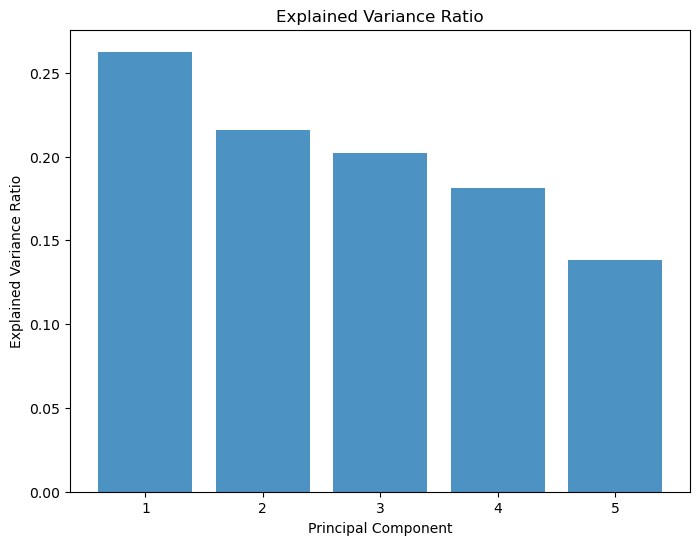

In [5]:
# Section 5: Visualizing Explained Variance
# Calculate the explained variance ratio
explained_variance_ratio = pca.eigenvalues / np.sum(pca.eigenvalues)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

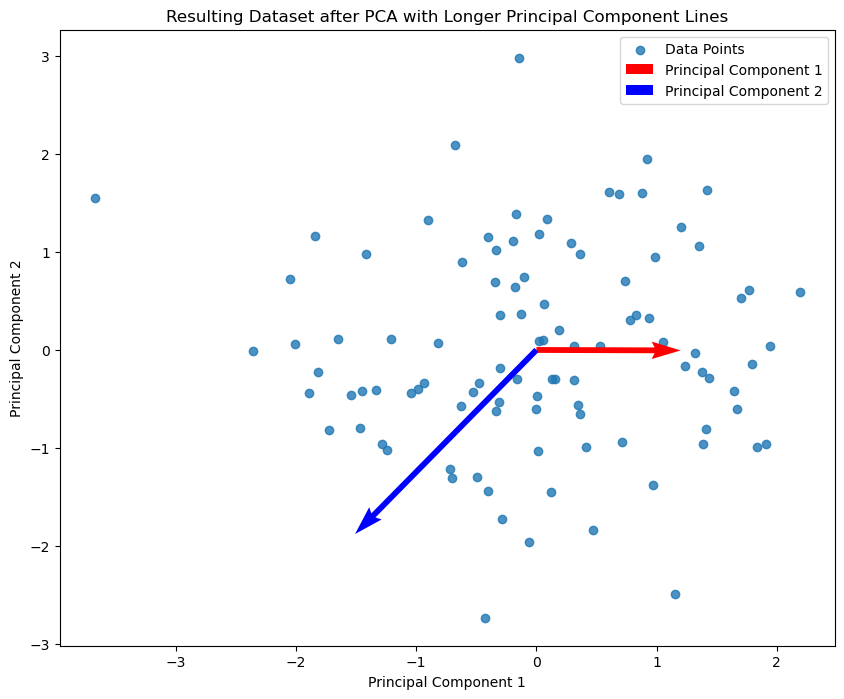

In [6]:
# Visualizing Resulting Dataset with Longer Principal Component Lines
plt.figure(figsize=(10, 8))

# Scatter plot of the resulting dataset
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8, label='Data Points')

# Plot lines representing the principal components
origin = np.zeros_like(pca.components[0, :])
scale_factor = 0.3  
plt.quiver(*origin, *pca.components[0, :], color='r', scale=scale_factor, scale_units='xy', angles='xy', label='Principal Component 1')
plt.quiver(*origin, *pca.components[1, :], color='b', scale=scale_factor, scale_units='xy', angles='xy', label='Principal Component 2')

plt.title('Resulting Dataset after PCA with Longer Principal Component Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [7]:
# Section 6: Visualizing Resulting Dataset
X_transformed[:5]

array([[-0.00302966, -0.59882437],
       [-1.28683249, -0.95790102],
       [ 1.66549521, -0.60500276],
       [ 1.4363139 , -0.28308313],
       [ 1.31536447, -0.03084568]])